In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/shrey/Desktop/Multiclass Logistic Regression/newdata.csv')
data_categorical = pd.read_csv('/Users/shrey/Downloads/Crop_recommendation.csv')

In [3]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,11,45,19,28.700121,44.359648,3.828031,44.116221,5
1,9,69,20,19.306073,23.963628,5.591561,129.344933,3
2,11,46,24,27.652802,89.806506,6.459252,56.525580,6
3,123,44,21,25.785445,75.005393,7.641117,91.395789,19
4,17,59,17,18.416700,23.428299,5.689858,132.980105,3
...,...,...,...,...,...,...,...,...
2195,6,77,20,25.787463,60.281630,6.058306,49.143372,8
2196,6,139,199,25.673850,81.621213,6.290998,74.109194,12
2197,103,33,33,26.717174,50.501485,7.131436,126.807398,21
2198,110,7,45,26.638386,84.695469,6.189214,48.324286,13


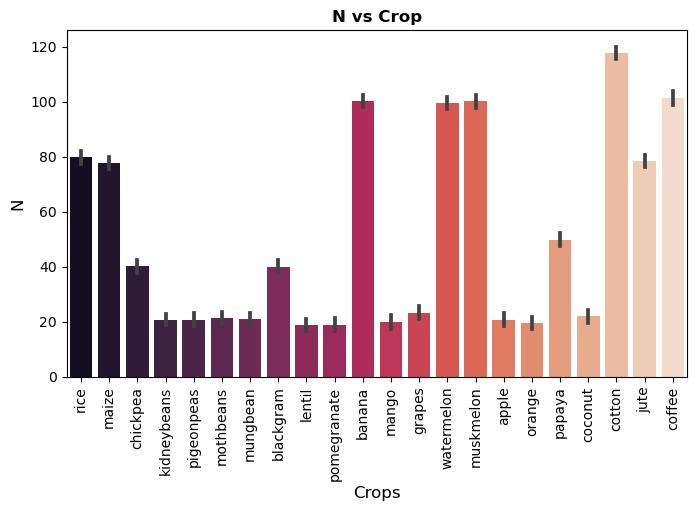

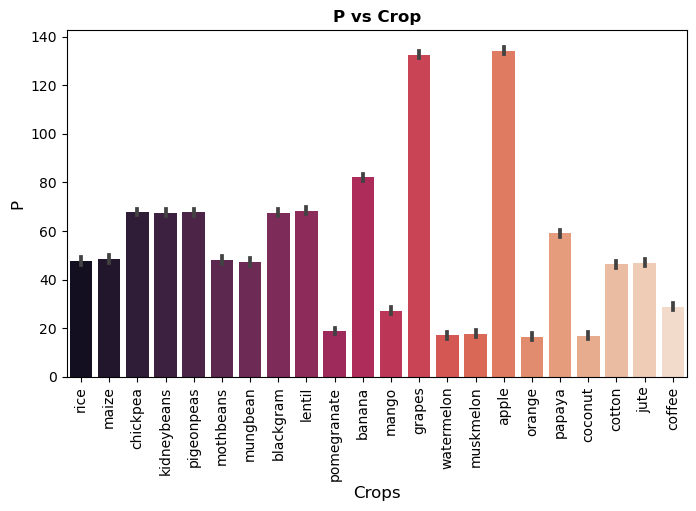

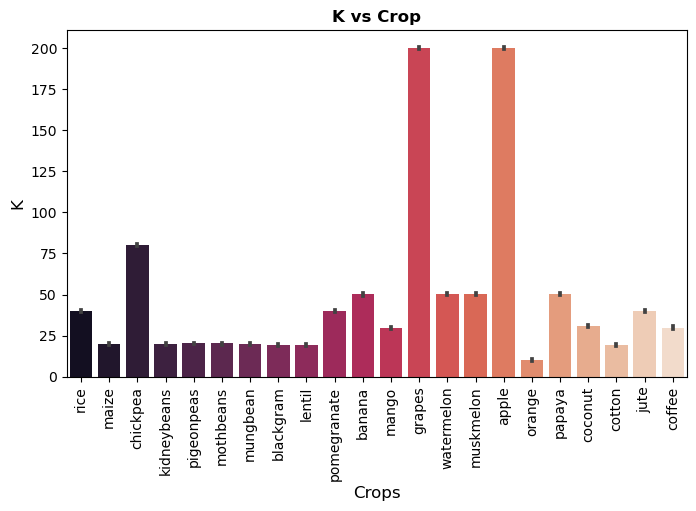

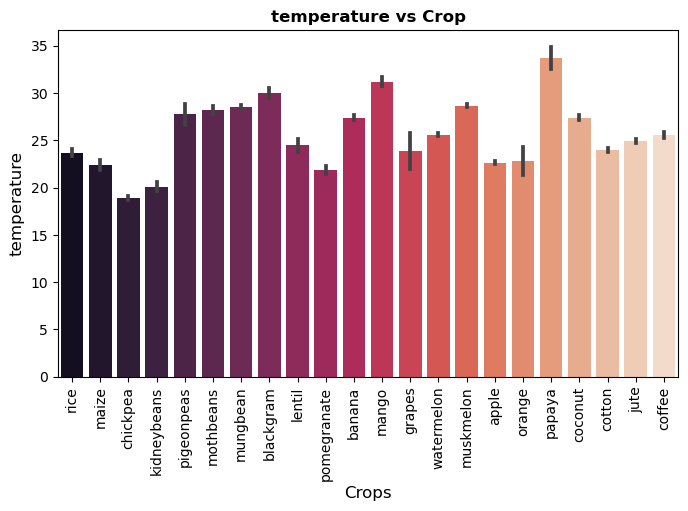

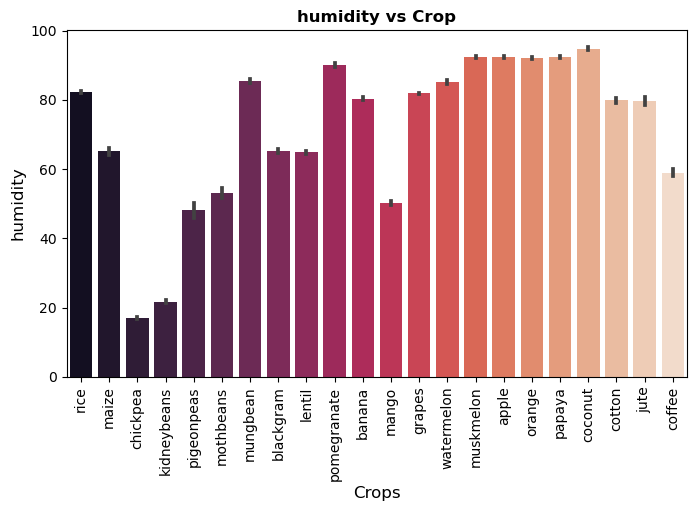

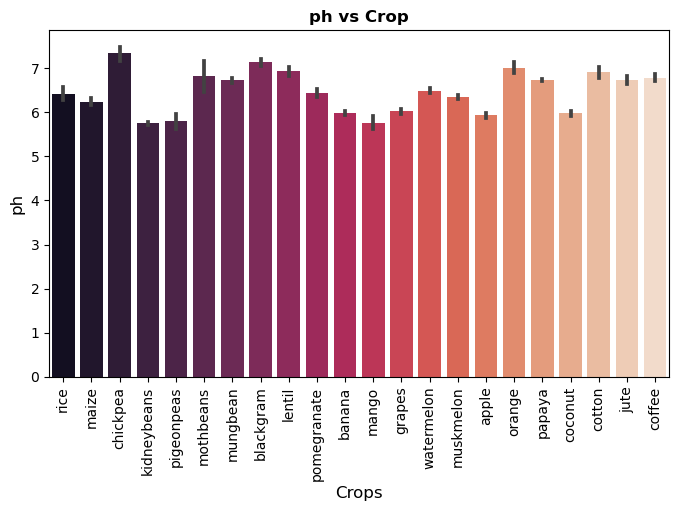

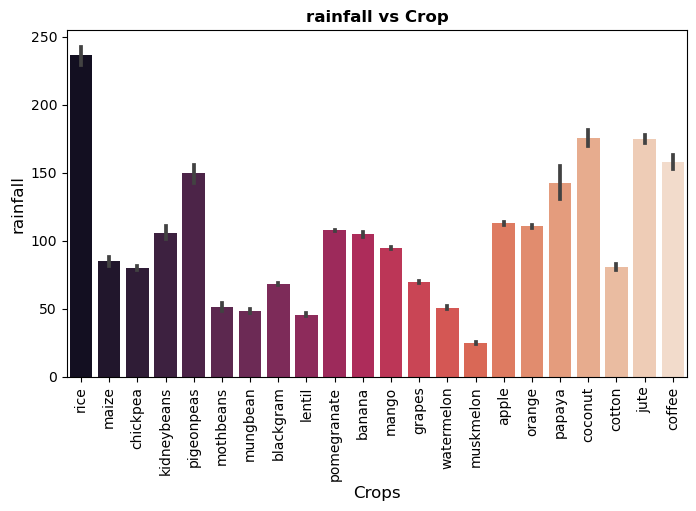

In [4]:
all_col = data_categorical.columns[:-1]

for col in all_col:
  plt.figure(figsize = (8, 4.5))
  sns.barplot(x = 'label', y = col, data = data_categorical, palette = 'rocket')
  plt.xlabel('Crops', fontsize = 12)
  plt.ylabel(col, fontsize = 12)
  plt.xticks(rotation=90)
  plt.title(f'{col} vs Crop', fontweight='bold')
  plt.show()

<Axes: xlabel='P', ylabel='label'>

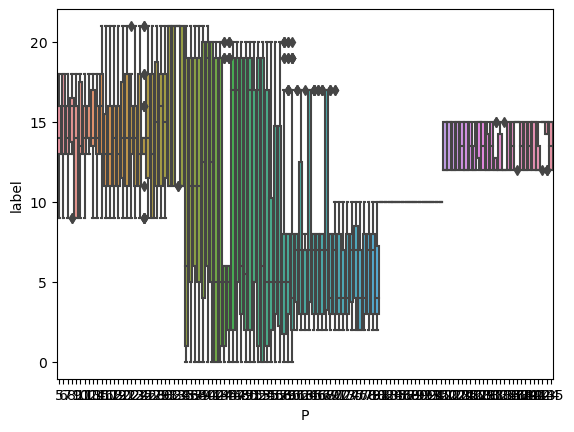

In [5]:
sns.boxplot(x = 'P', y = 'label', data = data) 

In [6]:
random.seed(123)

def separate_data():
    ""
    A = data[0:80]
    tA = data[80:100]
    B = data[100:180]
    tB = data[180:200]
    C = data[200:280]
    tC = data[280:300]

    D = data[300:380]
    tD = data[380:400]
    E = data[400:480]
    tE = data[480:500]
    F = data[500:580]
    tF = data[580:600]

    G = data[600:680]
    tG = data[680:700]
    H = data[700:780]
    tH = data[780:800]
    I = data[800:880]
    tI = data[880:900]

    J = data[900:980]
    tJ = data[980:1000]
    K = data[1000:1080]
    tK = data[1080:1100]
    L = data[1100:1180]
    tL = data[1180:1200]

    M = data[1200:1280]
    tM = data[1280:1300]
    N = data[1300:1380]
    tN = data[1380:1400]
    O = data[1400:1480]
    tO = data[1480:1500]

    P = data[1500:1580]
    tP = data[1580:1600]
    Q = data[1600:1680]
    tQ = data[1680:1700]
    R = data[1700:1780]
    tR = data[1780:1800]

    S = data[1800:1880]
    tS = data[1880:1900]
    T = data[1900:1980]
    tT = data[1980:2000]
    U = data[2000:2080]
    tU = data[2080:2100]

    V = data[2100:2180]
    tV = data[2180:2200]

    train = np.concatenate((A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V))
    test =  np.concatenate((tA,tB,tC,tD,tE,tF,tG,tH,tI,tJ,tK,tL,tM,tN,tO,tP,tQ,tR,tS,tT,tU,tV))
    return train,test

train_percent = 80 # Train
test_percent = 20 # Test

train_file , test_file = separate_data()

X_train = np.array([k[:-1] for k in train_file])
Y_train = np.array([k[-1] for k in train_file])
X_test = np.array([k[:-1] for k in test_file])
Y_test = np.array([k[-1] for k in test_file])



In [7]:
# from sklearn.model_selection import train_test_split

# X = data.iloc[:, :-1]  # Selecting all columns except the last one
# Y = data.iloc[:, -1]   # Selecting the last column as target variable

# # Split the dataset into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# X_train

In [8]:
Y_test.shape

(440,)

In [9]:
X_train[0]

array([11.        , 45.        , 19.        , 28.70012137, 44.359648  ,
        3.82803146, 44.11622138])

In [10]:
# plt.figure(figsize=(10,10))
# plt.subplot(2,2,3)
# plt.scatter(X_train[0], X_train[1], c=Y_train, cmap=cm.viridis)
# plt.xlabel(data.columns[0])
# plt.ylabel(data.columns[1])

# plt.subplot(2,2,4)
# plt.scatter(X_train[3], X_train[4], c=Y_train, cmap=cm.viridis)
# plt.xlabel(data.columns[3])
# plt.ylabel(data.columns[4])
# plt.show()

In [11]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.metrics import confusion_matrix

In [12]:
class Multinomial_Regression(BaseEstimator, ClassifierMixin):
    def __init__(self, X, y,params=None):
        if (params == None):
            self.learningRate = 0.005                  # Learning Rate
            self.max_epoch = 3000
        else:
            self.params = params
            self.learningRate = params['LearningRate']
            self.max_epoch = params['Epoch'] # Epochs
        self.X = X
        self.y = y
        num_features = 7
        num_classes = 22

        # Initialize weight matrix with random values or zeros
        # For example, initializing with zeros:
        self.weight = np.zeros((num_features, num_classes))

    def cost_derivate_gradient(self,n,Ti,Oi, X):
      result = -(np.dot(X.T,(Ti - Oi)))/n
      return result

    def function_cost_J(self,n,Ti,Oi):
      result = -(np.sum(Ti * np.log(Oi)))/n
      return result

    def one_hot_encoding(self, Y):
      num_classes = 22
      OneHotEncoding = []
      for label in Y:
          encoding = [0] * num_classes
          encoding[label] = 1
          OneHotEncoding.append(encoding)
      return OneHotEncoding

    def accuracy_graphic(self, answer_graph):
        labels = 'Hits', 'Faults'
        sizes = [96.5, 3.3]
        explode = (0, 0.14)
        fig1, ax1 = plt.subplots()
        ax1.pie(answer_graph, explode=explode, colors=['green','red'], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
        ax1.axis('equal')
        plt.show()

    def softmax(self,z):
      soft = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
      return soft

    def show_probability(self, arrayProbability):
        print("Probabilities:\n['Rice', 'Maize', 'Chickpea', 'Kidneybeans', 'Pigeonpeas', 'Mothbeans', 'Mungbean', 'Blackgram', 'Lentil', 'Pomegranate', 'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple', 'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee']")

        arrayTotal = []
        for k in arrayProbability:
            k[0] = "%.3f" % k[0]
            k[1] = "%.3f" % k[1]
            k[2] = "%.3f" % k[2]
            k[3] = "%.3f" % k[3]
            k[4] = "%.3f" % k[4]
            k[5] = "%.3f" % k[5]
            k[6] = "%.3f" % k[6]
            k[7] = "%.3f" % k[7]
            k[8] = "%.3f" % k[8]
            k[9] = "%.3f" % k[9]
            k[10] = "%.3f" % k[10]
            k[11] = "%.3f" % k[11]
            k[12] = "%.3f" % k[12]
            k[13] = "%.3f" % k[13]
            k[14] = "%.3f" % k[14]
            k[15] = "%.3f" % k[15]
            k[16] = "%.3f" % k[16]
            k[17] = "%.3f" % k[17]
            k[18] = "%.3f" % k[18]
            k[19] = "%.3f" % k[19]
            k[20] = "%.3f" % k[20]
            k[21] = "%.3f" % k[21]
            arrayTotal.append(k)

        for index, data in enumerate(arrayTotal):
            prob0 = data[0] * 100
            prob1 = data[1] * 100
            prob2 = data[2] * 100
            prob3 = data[3] * 100
            prob4 = data[4] * 100
            prob5 = data[5] * 100
            prob6 = data[6] * 100
            prob7 = data[7] * 100
            prob8 = data[8] * 100
            prob9 = data[9] * 100
            prob10 = data[10] * 100
            prob11 = data[11] * 100
            prob12 = data[12] * 100
            prob13 = data[13] * 100
            prob14 = data[14] * 100
            prob15 = data[15] * 100
            prob16 = data[16] * 100
            prob17 = data[17] * 100
            prob18 = data[18] * 100
            prob19 = data[19] * 100
            prob20 = data[20] * 100
            prob21 = data[21] * 100
            string = " {}: {}%, {}%, {}%, {}%, {}%, {}%, {}%, {}%, {}%, {}%, {}%, {}%, {}%, {}%, {}%, {}%, {}%, {}%, {}%, {}%, {}%, {}%".format(index, "%.3f" % prob0, "%.3f" % prob1, "%.3f" % prob2, "%.3f" % prob3, "%.3f" % prob4, "%.3f" % prob5, "%.3f" % prob6, "%.3f" % prob7, "%.3f" % prob8, "%.3f" % prob9, "%.3f" % prob10, "%.3f" % prob11, "%.3f" % prob12, "%.3f" % prob13, "%.3f" % prob14, "%.3f" % prob15, "%.3f" % prob16, "%.3f" % prob17, "%.3f" % prob18, "%.3f" % prob19, "%.3f" % prob20, "%.3f" % prob21)
            print(string)

    def predict(self, X,y):
        acc0 = acc1 = acc2 = acc3 = acc4 = acc5 = acc6 = acc7 = acc8 = acc9 = acc10 = acc11 = acc12 = acc13 = acc14 = acc15 = acc16 = acc17 = acc18 = acc19 = acc20 = acc21 = 0
        v_resp = []
        n = len(y)
        Z = np.matmul(X, self.weight)
        Oi = self.softmax(Z)
        prevision = np.argmax(Oi,axis=1)
        self.show_probability(Oi)
        print("")
        procent = sum(prevision == y)/n
        print(" ID-Sample  | Class Classification |  Output |   Hoped output  ")
        for i in range(len(prevision)):
            if(prevision[i] == 0): print(" id :",i,"  | Rice        |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 1): print(" id :",i,"  | Maize       |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 2): print(" id :",i,"  | Chickpea    |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 3): print(" id :",i,"  | Kidneybeans |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 4): print(" id :",i,"  | Pigeonpeas  |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 5): print(" id :",i,"  | Mothbeans   |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 6): print(" id :",i,"  | Mungbean    |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 7): print(" id :",i,"  | Blackgram   |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 8): print(" id :",i,"  | Lentil      |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 9): print(" id :",i,"  | Pomegranate |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 10): print(" id :",i,"  | Banana      |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 11): print(" id :",i,"  | Mango       |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 12): print(" id :",i,"  | Grapes      |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 13): print(" id :",i,"  | Watermelon  |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 14): print(" id :",i,"  | Muskmelon   |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 15): print(" id :",i,"  | Apple       |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 16): print(" id :",i,"  | Orange      |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 17): print(" id :",i,"  | Papaya      |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 18): print(" id :",i,"  | Coconut     |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 19): print(" id :",i,"  | Cotton      |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 20): print(" id :",i,"  | Jute        |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 21): print(" id :",i,"  | Coffee      |  Output:",prevision[i],"   |",y[i])


        for i in range(len(prevision)):
            if((prevision[i] == y[i])and(prevision[i] == 0)):acc0+=1
            elif((prevision[i] == y[i])and(prevision[i] == 1)):acc1+=1
            elif((prevision[i] == y[i])and(prevision[i] == 2)):acc2+=1
            elif((prevision[i] == y[i])and(prevision[i] == 3)):acc3+=1
            elif((prevision[i] == y[i])and(prevision[i] == 4)):acc4+=1
            elif((prevision[i] == y[i])and(prevision[i] == 5)):acc5+=1
            elif((prevision[i] == y[i])and(prevision[i] == 6)):acc6+=1
            elif((prevision[i] == y[i])and(prevision[i] == 7)):acc7+=1
            elif((prevision[i] == y[i])and(prevision[i] == 8)):acc8+=1
            elif((prevision[i] == y[i])and(prevision[i] == 9)):acc9+=1
            elif((prevision[i] == y[i])and(prevision[i] == 10)):acc10+=1
            elif((prevision[i] == y[i])and(prevision[i] == 11)):acc11+=1
            elif((prevision[i] == y[i])and(prevision[i] == 12)):acc12+=1
            elif((prevision[i] == y[i])and(prevision[i] == 13)):acc13+=1
            elif((prevision[i] == y[i])and(prevision[i] == 14)):acc14+=1
            elif((prevision[i] == y[i])and(prevision[i] == 15)):acc15+=1
            elif((prevision[i] == y[i])and(prevision[i] == 16)):acc16+=1
            elif((prevision[i] == y[i])and(prevision[i] == 17)):acc17+=1
            elif((prevision[i] == y[i])and(prevision[i] == 18)):acc18+=1
            elif((prevision[i] == y[i])and(prevision[i] == 19)):acc19+=1
            elif((prevision[i] == y[i])and(prevision[i] == 20)):acc20+=1
            elif((prevision[i] == y[i])and(prevision[i] == 21)):acc21+=1


        correct = procent * 100
        incorrect = 100 - correct
        v_resp.append(correct)
        v_resp.append(incorrect)
        self.accuracy_graphic(v_resp)

        predicted_labels = np.argmax(Oi, axis=1)
        actual_labels = y

        # Create confusion matrix
        confusion_mat = confusion_matrix(actual_labels, predicted_labels)

        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Rice', 'Maize', 'Chickpea', 'Kidneybeans', 'Pigeonpeas', 'Mothbeans', 'Mungbean', 'Blackgram', 'Lentil', 'Pomegranate', 'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple', 'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
                    yticklabels=['Rice', 'Maize', 'Chickpea', 'Kidneybeans', 'Pigeonpeas', 'Mothbeans', 'Mungbean', 'Blackgram', 'Lentil', 'Pomegranate', 'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple', 'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()

        return "%.2f"%(correct), acc0, acc1, acc2, acc3, acc4, acc5, acc6, acc7, acc8, acc9, acc10, acc11, acc12, acc13, acc14, acc15, acc16, acc17, acc18, acc19, acc20, acc21

    def show_err_graphic(self,v_epoch,v_error):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoch, v_error, "m-")
        plt.xlabel("Number of Epoch")
        plt.ylabel("Error")
        plt.title("Error Minimization")
        plt.show()

    def fit(self,X,y):
        v_epochs = []
        totalError = []
        epochCount = 0
        n = len(X)
        gradientE = []
        while(epochCount < self.max_epoch):
            Ti = self.one_hot_encoding(y)
            Z = np.matmul(X,self.weight)
            Oi = self.softmax(Z)
            erro = self.function_cost_J(n,Ti,Oi)
            gradient = self.cost_derivate_gradient(n,Ti,Oi,X)
            self.weight = self.weight - self.learningRate * gradient
            if(epochCount % 100 == 0):
                totalError.append(erro)
                gradientE.append(gradient)
                v_epochs.append(epochCount)
                print("Epoch ",epochCount," Total Error:", "%.4f" % erro)

            epochCount += 1

        self.show_err_graphic(v_epochs,totalError)
        return self




In [13]:
arguments = {'Epoch':10000, 'LearningRate':0.005}
# SoftmaxRegression = Multinomial_Regression(X_train,Y_train,arguments)

Epoch  0  Total Error: 3.0910
Epoch  100  Total Error: 0.7918
Epoch  200  Total Error: 0.6905
Epoch  300  Total Error: 0.4898
Epoch  400  Total Error: 0.4901
Epoch  500  Total Error: 0.4211
Epoch  600  Total Error: 0.4654
Epoch  700  Total Error: 0.3937
Epoch  800  Total Error: 0.3458
Epoch  900  Total Error: 0.3089
Epoch  1000  Total Error: 0.2982
Epoch  1100  Total Error: 0.2878
Epoch  1200  Total Error: 0.2760
Epoch  1300  Total Error: 0.2617
Epoch  1400  Total Error: 0.2442
Epoch  1500  Total Error: 0.2269
Epoch  1600  Total Error: 0.2154
Epoch  1700  Total Error: 0.2072
Epoch  1800  Total Error: 0.2007
Epoch  1900  Total Error: 0.1952
Epoch  2000  Total Error: 0.1905
Epoch  2100  Total Error: 0.1864
Epoch  2200  Total Error: 0.1827
Epoch  2300  Total Error: 0.1794
Epoch  2400  Total Error: 0.1764
Epoch  2500  Total Error: 0.1736
Epoch  2600  Total Error: 0.1710
Epoch  2700  Total Error: 0.1686
Epoch  2800  Total Error: 0.1664
Epoch  2900  Total Error: 0.1642
Epoch  3000  Total Err

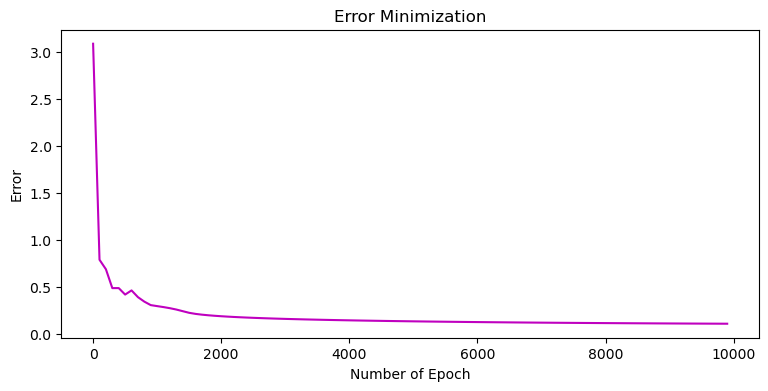

Multinomial_Regression(X=array([[ 11.        ,  45.        ,  19.        , ...,  44.359648  ,
          3.82803146,  44.11622138],
       [  9.        ,  69.        ,  20.        , ...,  23.96362799,
          5.591561  , 129.3449326 ],
       [ 11.        ,  46.        ,  24.        , ...,  89.80650642,
          6.45925202,  56.52558045],
       ...,
       [ 77.        ,  52.        ,  41.        , ...,  83.46409075,
          6.09729406, 167.7230632 ],
       [101.        ,  70.        ,  48.        , ...,  75.03193255,
          6.01269666, 116.5531455 ],
       [114.        ,   8.        ,  50.        , ...,  88.30866319,
          6.58158793,  57.95826144]]),
                       params={'Epoch': 10000, 'LearningRate': 0.005},
                       y=array([ 5,  3,  6, ..., 20, 10, 13]))

In [14]:
Y_train = Y_train.astype(int)
SoftmaxRegression = Multinomial_Regression(X_train,Y_train,arguments)
SoftmaxRegression.fit(X_train,Y_train)

Probabilities:
['Rice', 'Maize', 'Chickpea', 'Kidneybeans', 'Pigeonpeas', 'Mothbeans', 'Mungbean', 'Blackgram', 'Lentil', 'Pomegranate', 'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple', 'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee']
 0: 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 99.800%, 0.000%, 0.000%, 0.200%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%
 1: 0.000%, 0.400%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 99.600%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%
 2: 0.000%, 0.000%, 0.000%, 96.800%, 3.200%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%
 3: 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 100.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%, 0.000%
 4: 100.000%, 0.00

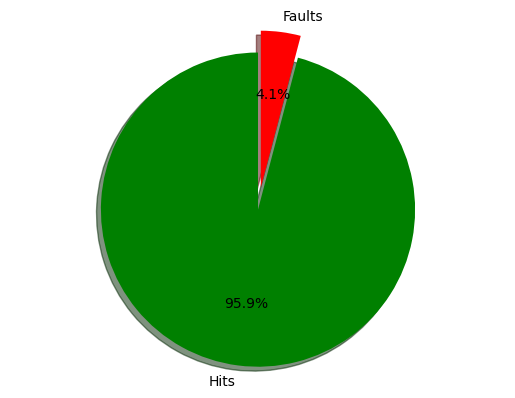

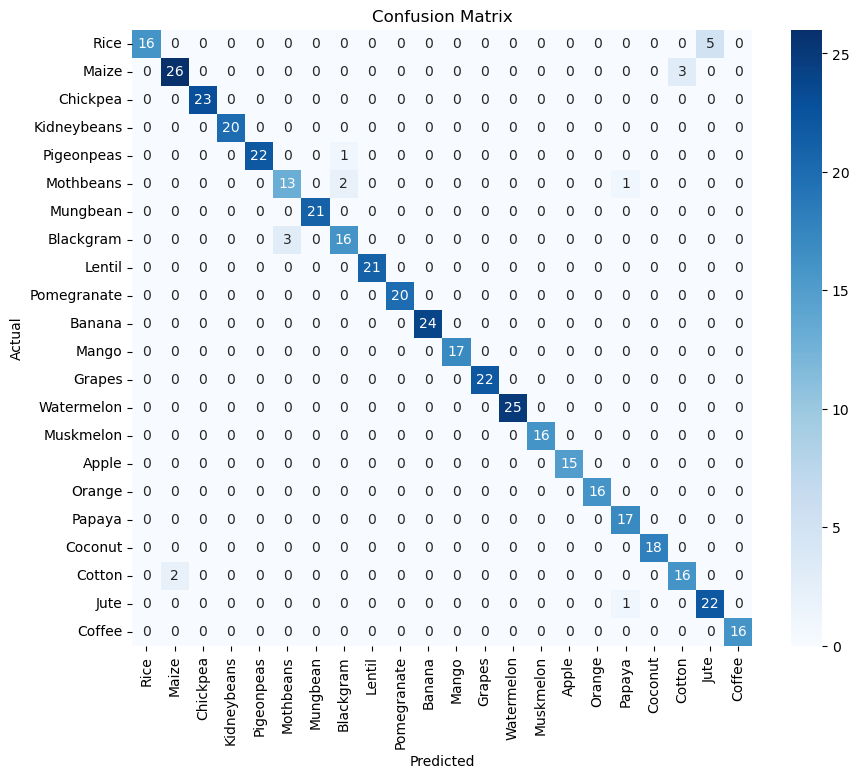

Hits % :  95.91 % hits


In [15]:
Y_test = Y_test.astype(int)
accuracy, acc0, acc1, acc2, acc3, acc4, acc5, acc6, acc7, acc8, acc9, acc10, acc11, acc12, acc13, acc14, acc15, acc16, acc17, acc18, acc19, acc20, acc21 = SoftmaxRegression.predict(X_test, Y_test)
print("Hits % : ", accuracy,"% hits")